In [1]:
# Import some standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [2]:
# Ensure that all plots happen inline
%matplotlib inline

In [3]:
# Load the iris dataset from SciKitLearn
iris = load_iris()

In [27]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [4]:
# Load features into a pandas dataframe
data = pd.DataFrame(iris.data)

In [5]:
# Set the column names to be the feature names
data.columns = iris.feature_names

In [6]:
# Look at the first 5 rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Explore the dataset
===

In [35]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


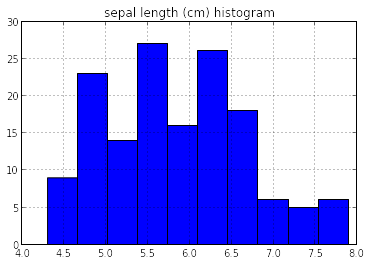

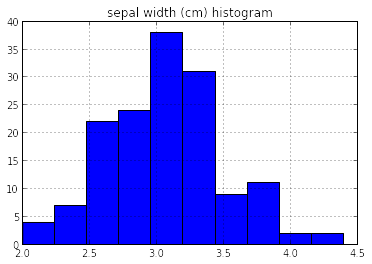

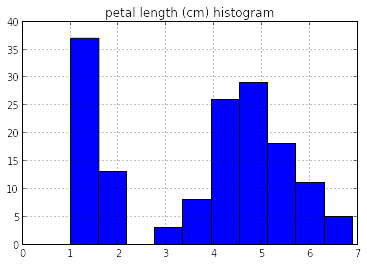

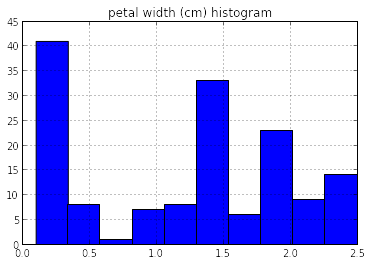

In [38]:
for col in data.columns:
    plt.figure()
    data[col].hist()
    plt.title(col+" histogram")

In [14]:
# Set the iris categories as the target
target = pd.Series(iris.target)

In [15]:
target.shape

(150,)

In [16]:
data.shape

(150, 4)

In [17]:
target.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [19]:
# See how many of each category is in the target set
target.value_counts()

2    50
1    50
0    50
dtype: int64

Random Forest
===

In [20]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)

In [30]:
# Instantiate a random forest model
rf = RandomForestClassifier(n_estimators=20)
# (Can vary the number of trees)

In [31]:
# Fit the model with the training data
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
# Look at the feature importances
rf.feature_importances_

array([ 0.12506699,  0.02125359,  0.4148106 ,  0.43886882])

In [33]:
# Match them to the column names
zip(data.columns, rf.feature_importances_)

[('sepal length (cm)', 0.12506699122266215),
 ('sepal width (cm)', 0.021253587518835756),
 ('petal length (cm)', 0.41481059819041699),
 ('petal width (cm)', 0.43886882306808517)]

In [34]:
# See how well this model performs
rf.score(X_test, Y_test)

0.93333333333333335